In [1]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/modisco_seqlet_occurences/endothelial_cell"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
h5_path = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/collate_peak_outputs/endothelial_cell/peak_outputs.h5"

In [3]:
h5_data = h5py.File(h5_path, 'r')
h5_data.keys()

<KeysViewHDF5 ['chr', 'end', 'mask', 'obs', 'peak_name', 'seqs', 'start', 'summit', 'tracks']>

In [4]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_43,xs.pos.pattern_44,xs.pos.pattern_45,xs.pos.pattern_46,xs.pos.pattern_47,xs.pos.pattern_5,xs.pos.pattern_6,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9
0,chr1,3121337,3121796,total_peak_140,588,.,12.41760,58.87260,56.37410,229,...,0,0,0,0,0,0,0,0,0,0
1,chr1,3191533,3192041,total_peak_141a,36,.,2.48353,3.60957,1.94164,119,...,0,0,0,0,0,0,0,0,0,0
2,chr1,3191533,3192041,total_peak_141b,335,.,8.60956,33.52660,31.23600,348,...,0,0,0,0,0,0,0,0,0,0
3,chr1,3360964,3361276,total_peak_143,119,.,4.63592,11.92300,9.94400,108,...,0,0,0,0,0,0,0,0,0,0
4,chr1,3670569,3670973,total_peak_146,394,.,7.10173,39.47270,37.12530,260,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159576,JH584304.1,101687,101902,total_peak_129,1212,.,3.24063,121.23100,118.43100,101,...,0,0,0,0,0,0,0,0,0,0
159577,JH584304.1,103144,103422,total_peak_130,3552,.,5.33690,355.22000,351.90000,164,...,0,0,0,0,0,0,0,0,0,0
159578,JH584304.1,103769,104115,total_peak_131,15200,.,12.45700,1520.09000,1514.58000,106,...,0,0,0,0,0,0,0,0,0,0
159579,JH584304.1,104202,104357,total_peak_132,2185,.,4.17417,218.51700,215.45800,81,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# num_peaks = h5_data['chr'].shape[0]
# h5_ind_map = {(chr.decode(), summit): ind for chr, summit, ind in zip(h5_data["chr"], h5_data["summit"], range(num_peaks))}
h5_ind_map = {name.decode(): ind for ind, name in enumerate(h5_data["peak_name"])}

# list(h5_ind_map.keys())[0]

In [6]:
data_endo = data

In [7]:
h5_inds = [h5_ind_map[r["1"]] for _, r in data_endo.iterrows()]
h5_inds[:5]

[0, 1, 2, 3, 4]

In [23]:
def plot_contribs(track, seq, ax):
    contribs = track[:,None] * seq
    df = pd.DataFrame(contribs, columns = ['A','C','G','T'])
    logomaker.Logo(df, ax=ax)

def plot_count_tracks(h5_data, idx):
    x = list(range(1000))
    tracks = h5_data["tracks"]
    seq = h5_data["seqs"][idx,557:1557]

    gs = gridspec.GridSpec(21,1)
    fig = plt.figure(figsize=(30, 15), dpi=200)

    ax = fig.add_subplot(gs[0])
    # print(h5_data["obs"][idx,:])
    ax.plot(x, h5_data["obs"][idx,557:1557])

    ax = fig.add_subplot(gs[1], sharex=ax)
    # print(h5_data["tracks"][idx,2,0,:])
    ax.plot(x, tracks[idx,0,0,557:1557])
    ax = fig.add_subplot(gs[2], sharex=ax)
    ax.plot(x, tracks[idx,0,1,557:1557])
    ax = fig.add_subplot(gs[3], sharex=ax)
    ax.plot(x, tracks[idx,0,2,557:1557])
    ax = fig.add_subplot(gs[4], sharex=ax)
    ax.plot(x, tracks[idx,0,3,557:1557])
    ax = fig.add_subplot(gs[5], sharex=ax)
    ax.plot(x, tracks[idx,0,4,557:1557])

    ax = fig.add_subplot(gs[6], sharex=ax)
    plot_contribs(tracks[idx,4,0,557:1557], seq, ax)
    ax = fig.add_subplot(gs[7], sharex=ax)
    plot_contribs(tracks[idx,4,1,557:1557], seq, ax)
    ax = fig.add_subplot(gs[8], sharex=ax)
    plot_contribs(tracks[idx,4,2,557:1557], seq, ax)
    ax = fig.add_subplot(gs[9], sharex=ax)
    plot_contribs(tracks[idx,4,3,557:1557], seq, ax)
    ax = fig.add_subplot(gs[10], sharex=ax)
    plot_contribs(tracks[idx,4,4,557:1557], seq, ax)
    
    ax = fig.add_subplot(gs[11], sharex=ax)
    ax.plot(x, tracks[idx,1,0,557:1557])
    ax = fig.add_subplot(gs[12], sharex=ax)
    ax.plot(x, tracks[idx,1,1,557:1557])
    ax = fig.add_subplot(gs[13], sharex=ax)
    ax.plot(x, tracks[idx,1,2,557:1557])
    ax = fig.add_subplot(gs[14], sharex=ax)
    ax.plot(x, tracks[idx,1,3,557:1557])
    ax = fig.add_subplot(gs[15], sharex=ax)
    ax.plot(x, tracks[idx,1,4,557:1557])
    
    ax = fig.add_subplot(gs[16], sharex=ax)
    plot_contribs(tracks[idx,5,0,557:1557], seq, ax)
    ax = fig.add_subplot(gs[17], sharex=ax)
    plot_contribs(tracks[idx,5,1,557:1557], seq, ax)
    ax = fig.add_subplot(gs[18], sharex=ax)
    plot_contribs(tracks[idx,5,2,557:1557], seq, ax)
    ax = fig.add_subplot(gs[19], sharex=ax)
    plot_contribs(tracks[idx,5,3,557:1557], seq, ax)
    ax = fig.add_subplot(gs[20], sharex=ax)
    plot_contribs(tracks[idx,5,4,557:1557], seq, ax)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        labelbottom='off')

    plt.show()
    

In [24]:
# plot_count_tracks(h5_data, h5_inds[0])

In [25]:
sel_data = data.loc[data["ss.pos.pattern_6"] > 0]
sel_data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_43,xs.pos.pattern_44,xs.pos.pattern_45,xs.pos.pattern_46,xs.pos.pattern_47,xs.pos.pattern_5,xs.pos.pattern_6,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9
44,chr1,4616607,4616864,total_peak_191,105,.,2.58287,10.5635,8.6173,103,...,0,0,0,0,0,0,0,0,0,0
85,chr1,5022778,5023198,total_peak_238,863,.,8.02057,86.3364,83.6809,155,...,0,0,0,0,0,0,0,0,0,0
193,chr1,10990971,10991230,total_peak_377,237,.,3.24324,23.7298,21.5536,122,...,0,0,0,0,0,0,0,0,0,0
232,chr1,11986834,11987102,total_peak_423,175,.,5.79490,17.5533,15.4664,108,...,0,0,0,0,0,0,0,0,0,0
241,chr1,12507961,12508520,total_peak_439,1059,.,14.65910,105.9770,103.2350,237,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159038,chrX,159387054,159387633,total_peak_179479,266,.,7.45058,26.6077,24.3940,298,...,0,0,0,0,0,0,0,0,0,0
159214,chrX,164145412,164146476,total_peak_179660b,168,.,5.04202,16.8498,14.7750,640,...,0,0,0,0,0,0,0,0,0,0
159222,chrX,164256122,164256519,total_peak_179669,642,.,6.83132,64.2974,61.7636,147,...,0,0,0,0,0,0,0,0,0,0
159275,chrX,166930954,166931653,total_peak_179728,1879,.,17.14740,187.9420,184.9520,291,...,0,0,0,0,0,0,0,0,0,0


In [26]:
sel_inds = [h5_ind_map[r["1"]] for _, r in sel_data.iterrows()]


In [27]:
# s2 = jscatter.Scatter(data=data_endo, x="ss_mean", y="xs_mean", color_by="ss.pos.pattern_6", height=480)
# s = jscatter.Scatter(data=data_endo, x="diff_mean_qn", y="contrib_counts_e_dist", color_by="ss.pos.pattern_6", height=480)

# jscatter.link([
#     s, s2
# ])
# # s.show()

In [28]:
# sel = s.selection()
# sel_data = data_endo.iloc[sel]
# sel_data

In [29]:
# sel_inds = [h5_ind_map[r["1"]] for _, r in sel_data.iterrows()]


In [30]:
def dist_metric(a, b):
    a_normalized = a / np.sqrt((a**2).sum(axis=0, keepdims=True))
    b_normalized = b / np.sqrt((b**2).sum(axis=0, keepdims=True))
    dist = np.nan_to_num(np.sqrt(((a_normalized - b_normalized)**2).sum(axis=0)))
    return dist

def pairwise_dists(contribs_ss, contribs_xs):
    n_ss = contribs_ss.shape[0]
    n_xs = contribs_xs.shape[0]
    n = n_ss + n_xs

    all_data = np.concatenate((contribs_ss, contribs_xs), axis=0)

    ltri_dists = np.zeros((n, n),)
    for j in range(n):
        for i in range(j, n):
            a = all_data[i]
            b = all_data[j]
            dist = dist_metric(a, b)
            ltri_dists[i,j] = dist

    # print(ltri_dists.diagonal(axis1=1, axis2=2).mean()) ####
    # assert(ltri_dists.diagonal(axis1=1, axis2=2).sum() == 0)

    dists_all = ltri_dists + ltri_dists.transpose(1, 0)
    
    ss_self_dists = dists_all[:n_ss,:n_ss]
    xs_self_dists = dists_all[n_ss:n,n_ss:n]
    cross_dists = dists_all[:n_ss,n_ss:n]

    return dists_all, ss_self_dists, xs_self_dists, cross_dists

In [31]:
rnum = 1
idx = sel_inds[rnum]


In [32]:
dists_all, ss_self_dists, xs_self_dists, cross_dists = tracks = pairwise_dists(h5_data["tracks"][idx,4,:,:], h5_data["tracks"][idx,5,:,:])
print(ss_self_dists)
print(xs_self_dists)
print(cross_dists)

[[0.         0.53378695 0.5347271  0.57794338 0.51733613]
 [0.53378695 0.         0.55147409 0.60348576 0.61423647]
 [0.5347271  0.55147409 0.         0.54102522 0.57326245]
 [0.57794338 0.60348576 0.54102522 0.         0.61222988]
 [0.51733613 0.61423647 0.57326245 0.61222988 0.        ]]
[[0.         0.72701788 0.62417293 0.64090872 0.77372569]
 [0.72701788 0.         0.60946786 0.52716553 0.64572608]
 [0.62417293 0.60946786 0.         0.55600357 0.75253636]
 [0.64090872 0.52716553 0.55600357 0.         0.64399946]
 [0.77372569 0.64572608 0.75253636 0.64399946 0.        ]]
[[0.94091791 0.89208972 0.9279229  0.90399116 0.89932889]
 [0.93846893 0.86313927 0.9451614  0.86457121 0.81934923]
 [0.95373386 0.93203425 0.93590105 0.89656132 0.91457921]
 [1.08108699 1.01792681 1.06516171 1.03652155 1.00684965]
 [1.09860253 1.07072866 1.10180771 1.06291914 1.05601025]]


In [33]:
print(np.mean(ss_self_dists))
print(np.mean(xs_self_dists))
print(np.mean(cross_dists))

0.4527605962753296
0.5200579261779785
0.9690146136283875


In [34]:
# a = h5_data["tracks"][idx,4,:,:] / h5_data["tracks"][idx,4,:,:].sum(axis=1, keepdims=True)
# b = h5_data["tracks"][idx,5,:,:] / h5_data["tracks"][idx,5,:,:].sum(axis=1, keepdims=True)
# dists_all, ss_self_dists, xs_self_dists, cross_dists = tracks = pairwise_dists(a, b)
# print(ss_self_dists)
# print(xs_self_dists)
# print(cross_dists)
# print(np.mean(ss_self_dists))
# print(np.mean(xs_self_dists))
# print(np.mean(cross_dists))

In [35]:
# print(sel_data.iloc[idx])
sel_data.iloc[rnum][["ss_self_contrib_counts_dist_mean", "xs_self_contrib_counts_dist_mean", "cross_contrib_counts_dist_mean"]]

ss_self_contrib_counts_dist_mean    0.452761
xs_self_contrib_counts_dist_mean    0.520058
cross_contrib_counts_dist_mean      0.969015
Name: 85, dtype: object

In [36]:
# print(sel_data.iloc[rnum]["ss_mean"], np.log1p(np.sum(h5_data["tracks"][idx,0,:,:], axis=1)).mean(axis=0), sel_data.iloc[rnum]["obs_logcounts"], np.log1p(np.sum(h5_data["obs"][idx,:], axis=0)))

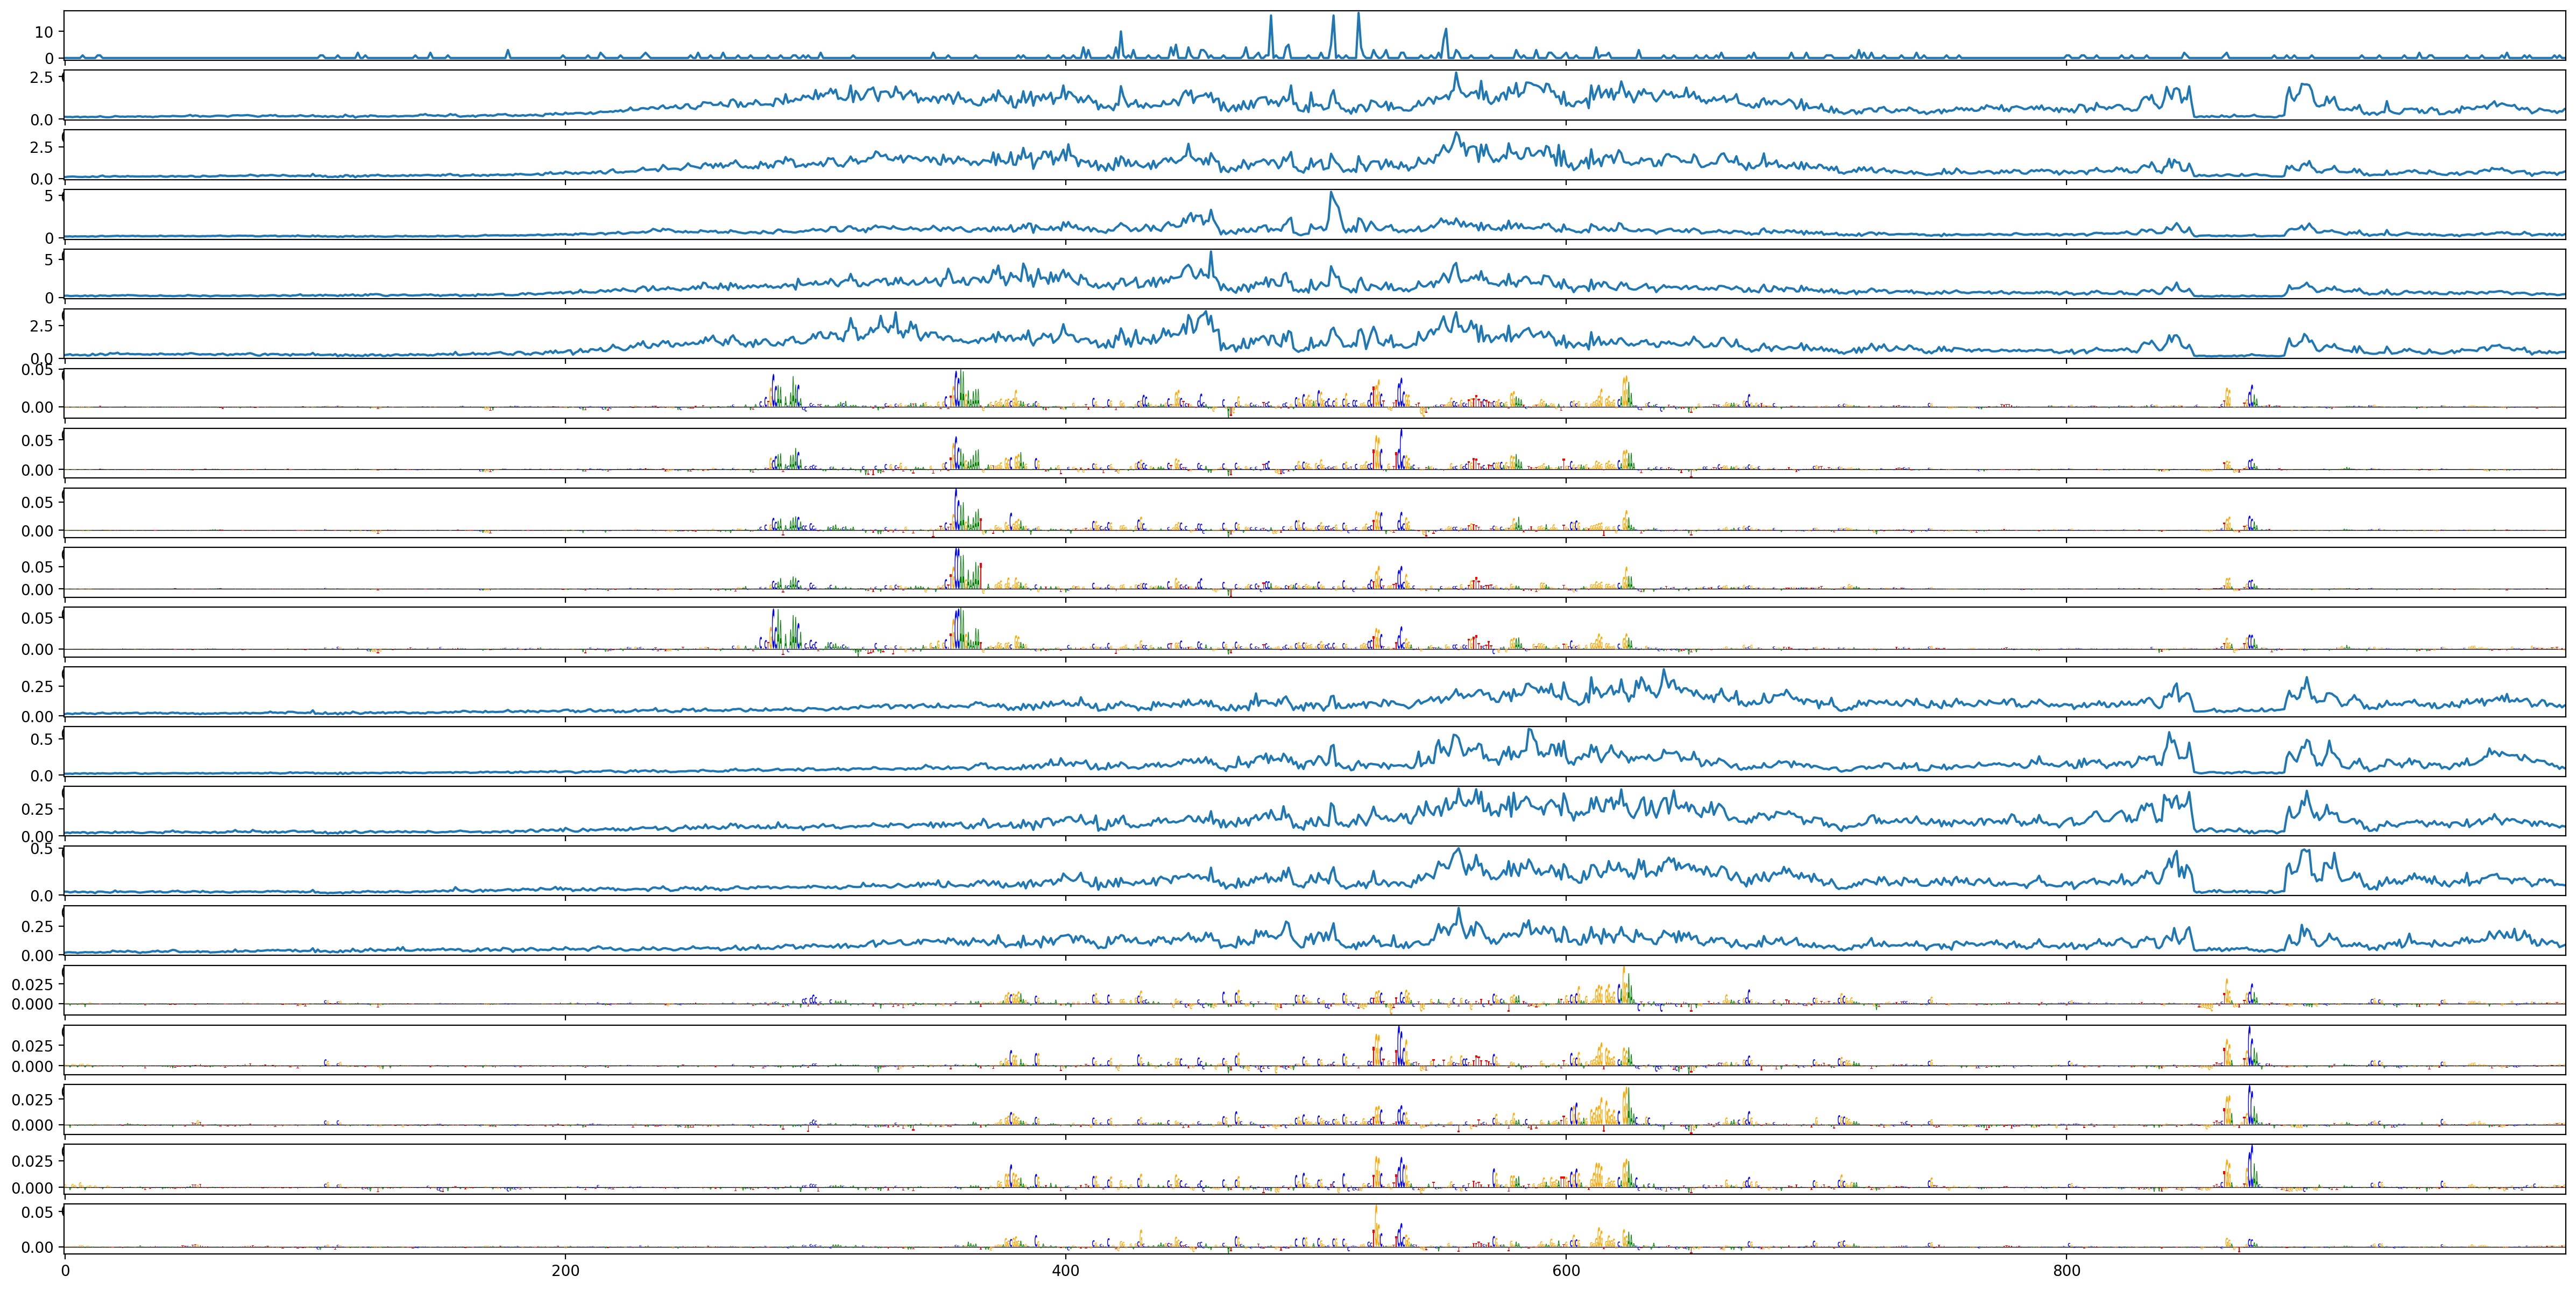

In [37]:
plot_count_tracks(h5_data, idx)
